In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("fifa_data.csv")
df.shape


(18207, 89)

In [2]:
df = df.drop(['Unnamed: 0', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall', 'Potential', 'Club', 'Club Logo', 'Value',
              'Wage','Special', 'Preferred Foot', 'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
              'Body Type', 'Real Face', 'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until', 'Height',
              'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM',
              'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'GKDiving', 'GKHandling', 
              'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause'], axis = 1)


In [3]:
df.shape
df.isnull().sum()

ID                  0
Name                0
Position           60
Crossing           48
Finishing          48
HeadingAccuracy    48
ShortPassing       48
Volleys            48
Dribbling          48
Curve              48
FKAccuracy         48
LongPassing        48
BallControl        48
Acceleration       48
SprintSpeed        48
Agility            48
Reactions          48
Balance            48
ShotPower          48
Jumping            48
Stamina            48
Strength           48
LongShots          48
Aggression         48
Interceptions      48
Positioning        48
Vision             48
Penalties          48
Composure          48
Marking            48
StandingTackle     48
SlidingTackle      48
dtype: int64

In [4]:
df = df.dropna()
df.isnull().sum()

ID                 0
Name               0
Position           0
Crossing           0
Finishing          0
HeadingAccuracy    0
ShortPassing       0
Volleys            0
Dribbling          0
Curve              0
FKAccuracy         0
LongPassing        0
BallControl        0
Acceleration       0
SprintSpeed        0
Agility            0
Reactions          0
Balance            0
ShotPower          0
Jumping            0
Stamina            0
Strength           0
LongShots          0
Aggression         0
Interceptions      0
Positioning        0
Vision             0
Penalties          0
Composure          0
Marking            0
StandingTackle     0
SlidingTackle      0
dtype: int64

In [5]:
df['Position'].value_counts()

ST     2152
GK     2025
CB     1778
CM     1394
LB     1322
RB     1291
RM     1124
LM     1095
CAM     958
CDM     948
RCB     662
LCB     648
LCM     395
RCM     391
LW      381
RW      370
RDM     248
LDM     243
LS      207
RS      203
RWB      87
LWB      78
CF       74
LAM      21
RAM      21
RF       16
LF       15
Name: Position, dtype: int64

In [6]:
# Convert the current 27 positions into 4 main position disciplines, Attacker, Midfielder, Defender, Goalkeeper
att = dict.fromkeys(['ST', 'LW', 'RW', 'LS', 'RS', 'CF', 'RF', 'LF'], 'Attacker')
mid = dict.fromkeys(['CM', 'RM', 'LM', 'CAM', 'CDM', 'LCM', 'RCM', 'RDM', 'LDM', 'RAM', 'LAM'], 'Midfielder')
dfnc = dict.fromkeys(['CB', 'LB', 'RB', 'RCB', 'LCB', 'RWB', 'LWB' ], 'Defender')
df.Position.replace('GK', 'Goalkeeper', inplace=True)
df.Position.replace(att, inplace=True)
df.Position.replace(mid, inplace=True)
df.Position.replace(dfnc, inplace=True)
df['Position'].value_counts()

Midfielder    6838
Defender      5866
Attacker      3418
Goalkeeper    2025
Name: Position, dtype: int64

In [7]:
# Check for duplicate players using the players unique player ID
df.duplicated('ID').sum()

0

In [8]:
# Nominate the features
feature_cols = ['Crossing','Finishing','HeadingAccuracy','ShortPassing','Volleys','Dribbling','Curve','FKAccuracy',
                'LongPassing','BallControl','Acceleration','SprintSpeed','Agility','Reactions','Balance','ShotPower',
                'Jumping','Stamina','Strength','LongShots','Aggression','Interceptions','Positioning','Vision',
                'Penalties','Composure','Marking','StandingTackle','SlidingTackle']

# Assign the feature data
X = df[feature_cols]
print(X.shape)

# Assign the outcomes
y = df['Position']
print(y.shape)
print(X.info())

(18147, 29)
(18147,)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 18147 entries, 0 to 18206
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crossing         18147 non-null  float64
 1   Finishing        18147 non-null  float64
 2   HeadingAccuracy  18147 non-null  float64
 3   ShortPassing     18147 non-null  float64
 4   Volleys          18147 non-null  float64
 5   Dribbling        18147 non-null  float64
 6   Curve            18147 non-null  float64
 7   FKAccuracy       18147 non-null  float64
 8   LongPassing      18147 non-null  float64
 9   BallControl      18147 non-null  float64
 10  Acceleration     18147 non-null  float64
 11  SprintSpeed      18147 non-null  float64
 12  Agility          18147 non-null  float64
 13  Reactions        18147 non-null  float64
 14  Balance          18147 non-null  float64
 15  ShotPower        18147 non-null  float64
 16  Jumping          18147 non-null  floa

In [9]:
def plot_train_time_curve(train_sizes, fit_times, title, alpha=0.1):
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)
    plt.plot(train_sizes, fit_times_mean, label='train points', color='blue', marker='o')
    plt.fill_between(train_sizes, fit_times_mean + fit_times_std,
                     fit_times_mean - fit_times_std, color='blue', alpha=alpha)
    plt.title(title)
    plt.xlabel('Number of training points')
    plt.ylabel('Training time')
    plt.grid(ls='--')
    plt.legend(loc='best')
    plt.show()


In [10]:
def plot_validation_curve(param_range, train_scores, test_scores, x_label, title, alpha=0.1):
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    plt.plot(param_range, train_mean, label='train score', color='blue', marker='o')
    plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, color='blue', alpha=alpha)
    plt.plot(param_range, test_mean, label='validation score', color='red', marker='o')
    plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, color='red', alpha=alpha)
    plt.title(title)
    plt.grid(ls='--')
    plt.xlabel(x_label)
    plt.ylabel('F1 score')
    plt.legend(loc='best')
    plt.show()



In [11]:
def plot_learning_curve(train_sizes, train_scores, test_scores, title, alpha=0.1):
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    plt.plot(train_sizes, train_mean, label='train score', color='blue', marker='o')
    plt.fill_between(train_sizes, train_mean + train_std,
                     train_mean - train_std, color='blue', alpha=alpha)
    plt.plot(train_sizes, test_mean, label='validation score', color='red', marker='o')

    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, color='red', alpha=alpha)
    plt.title(title)
    plt.xlabel('Number of training points')
    plt.ylabel('F1 score')
    plt.grid(ls='--')
    plt.legend(loc='best')
    plt.show()
    plt.savefig(title+".png")


In [12]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import learning_curve,validation_curve
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=40)

scaler=StandardScaler()
data_prep=make_column_transformer((scaler,make_column_selector(dtype_include='float64')))
s_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=40)


<AxesSubplot:title={'center':'Correlation of Features'}>

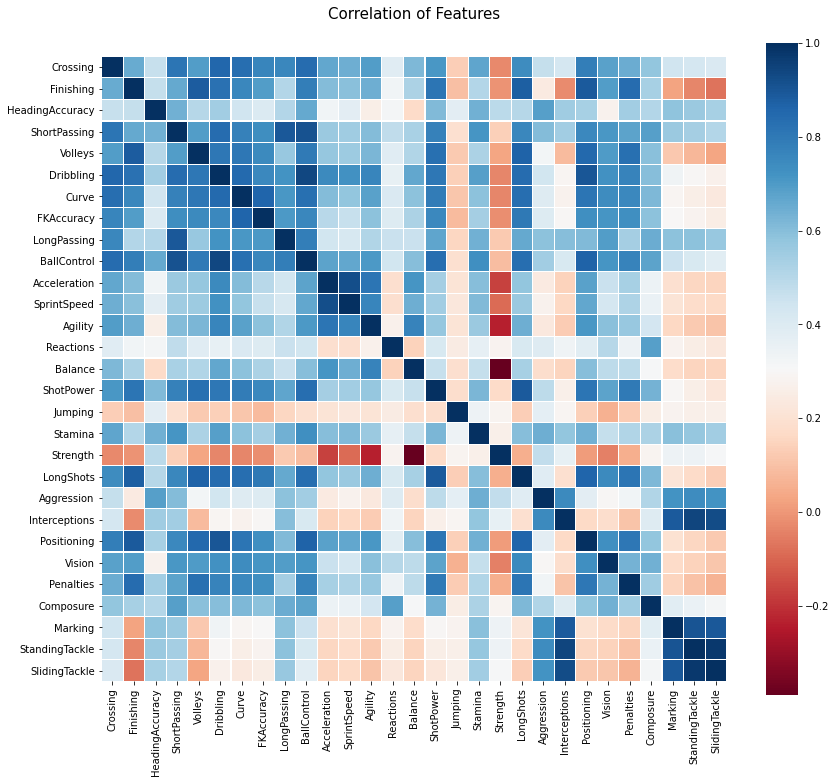

In [18]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Correlation of Features', y=1.05, size=15)
sns.heatmap(X_train.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=False)

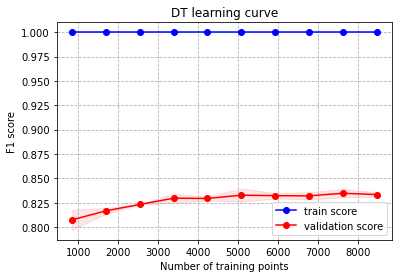

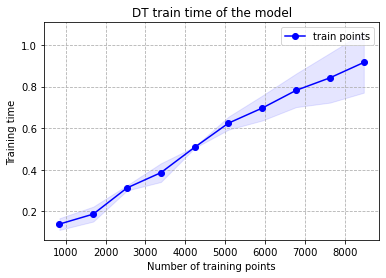

DT: F1 score= 0.837
              precision    recall  f1-score   support

    Attacker       0.74      0.73      0.73      1025
    Defender       0.86      0.87      0.86      1760
  Goalkeeper       1.00      1.00      1.00       608
  Midfielder       0.76      0.75      0.75      2052

    accuracy                           0.81      5445
   macro avg       0.84      0.84      0.84      5445
weighted avg       0.81      0.81      0.81      5445

[[ 747   10    0  268]
 [   5 1523    0  232]
 [   1    0  607    0]
 [ 263  245    0 1544]]
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 40, 'splitter': 'best'}
22


In [17]:
pipeline = make_pipeline(data_prep,DecisionTreeClassifier(random_state=40))
train_sizes, train_scores, test_scores,fit_times, _  = learning_curve(estimator=pipeline, X=X_train, y=y_train,
                                                       cv=s_kfold,scoring='f1_macro',
                                                       train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1,return_times=True)
                                                        
plot_learning_curve(train_sizes, train_scores, test_scores,'DT learning curve')
plot_train_time_curve(train_sizes, fit_times, 'DT train time of the model')


from sklearn.metrics import f1_score, classification_report, confusion_matrix
pipeline.fit(X_train, y_train)


# calculate pr auc
y_pred = pipeline.predict(X_test)
print('DT: F1 score= %.3f' %  f1_score(y_test, y_pred, average="macro"))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

print(pipeline.steps[1][1].get_params())
print(pipeline.steps[1][1].get_depth())

In [13]:
from sklearn.tree import DecisionTreeClassifier
X_train = data_prep.fit_transform(X_train)
print(X_train)
dt = DecisionTreeClassifier(random_state=40)
dt.fit(X_train, y_train)
print(dt.feature_importances_)

[[-0.03905275 -0.18166328  0.56099076 ...  0.84116884  0.80041779
   0.72369785]
 [ 0.66896485  0.74047087 -0.47461341 ... -0.46589298 -1.1378148
  -0.77773195]
 [ 0.12433593  0.53555217 -0.41707985 ... -0.36534977 -0.95322122
  -0.63697291]
 ...
 [ 1.75822269  0.33063347  0.90619216 ...  1.29361332  1.35419853
   1.70901116]
 [-0.09351564  0.38186314 -0.35954628 ... -0.26480655  0.84656618
   0.81753722]
 [-1.40062505 -1.10379744  0.44592363 ...  0.53953919  0.708121
   0.77061753]]
[0.03662832 0.02829266 0.08443245 0.01154881 0.0085923  0.0086759
 0.01079671 0.01319462 0.05539294 0.00592884 0.00921228 0.01613576
 0.00757109 0.00747173 0.00848357 0.00860455 0.00926509 0.01029224
 0.0086195  0.01158835 0.00950613 0.02094216 0.19175241 0.1407199
 0.01134773 0.00903334 0.02042324 0.01435543 0.22119196]


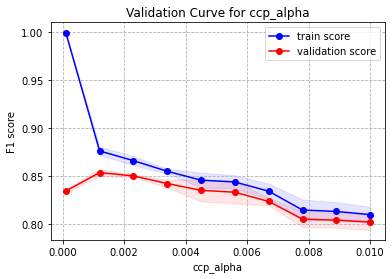

In [27]:
from sklearn.model_selection import validation_curve
pipeline = make_pipeline(data_prep,DecisionTreeClassifier(random_state=40))
ccp_alpha_range = np.linspace(0.0001, 0.01, 10)
train_scores, test_scores = validation_curve(
        estimator= pipeline, X=X_train, y=y_train, param_name="decisiontreeclassifier__ccp_alpha", param_range=ccp_alpha_range,
          cv=s_kfold, scoring='f1_macro', n_jobs=-1)
plot_validation_curve(ccp_alpha_range, train_scores, test_scores, 'ccp_alpha', title="Validation Curve for ccp_alpha", alpha=0.1)

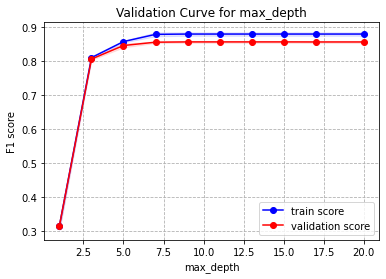

In [28]:
from sklearn.model_selection import validation_curve
pipeline = make_pipeline(data_prep,DecisionTreeClassifier(random_state=40,ccp_alpha=.001))
max_depths = np.linspace(1, 20, 10).astype(int)
train_scores, test_scores = validation_curve(
        estimator= pipeline, X=X_train, y=y_train, param_name="decisiontreeclassifier__max_depth", param_range=max_depths,
          cv=s_kfold, scoring='f1_macro', n_jobs=-1)
plot_validation_curve(max_depths, train_scores, test_scores, 'max_depth', title="Validation Curve for max_depth", alpha=0.1)

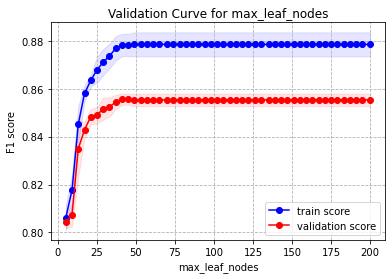

In [29]:
from sklearn.model_selection import validation_curve
pipeline = make_pipeline(data_prep,DecisionTreeClassifier(random_state=40,ccp_alpha=.001))
max_leaf_nodes = np.linspace(1, 200, 50).astype(int)
train_scores, test_scores = validation_curve(
        estimator= pipeline, X=X_train, y=y_train, param_name="decisiontreeclassifier__max_leaf_nodes", param_range=max_leaf_nodes,
          cv=s_kfold, scoring='f1_macro', n_jobs=-1)
plot_validation_curve(max_leaf_nodes, train_scores, test_scores, 'max_leaf_nodes', title="Validation Curve for max_leaf_nodes", alpha=0.1)

In [30]:
from sklearn.model_selection import GridSearchCV
pipeline = make_pipeline(data_prep,DecisionTreeClassifier(random_state=40))
ccp_alpha_range = np.linspace(0.0, 0.01, 50)
max_depth_range = list(range(1,10,1))
parameters = dict(decisiontreeclassifier__ccp_alpha=ccp_alpha_range,decisiontreeclassifier__max_depth=max_depth_range)
grid_search_cv = GridSearchCV(pipeline, parameters,cv=s_kfold,scoring='f1_macro')
grid_search_cv.fit(X_train, y_train)
print("Tuned dt best params: {}".format(grid_search_cv.best_params_))

Tuned dt best params: {'decisiontreeclassifier__ccp_alpha': 0.0006122448979591836, 'decisiontreeclassifier__max_depth': 9}


In [17]:
grid_search_cv.best_estimator_.steps[1][1].get_params()


{'ccp_alpha': 0.001,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 33,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

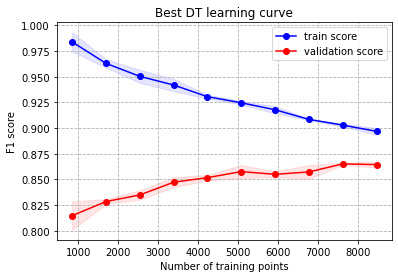

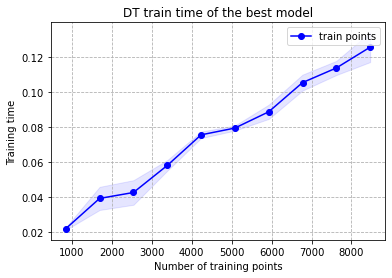

DT: Predict Time= 0.018
DT: F1 score= 0.861
              precision    recall  f1-score   support

    Attacker       0.79      0.75      0.77      1025
    Defender       0.86      0.91      0.88      1760
  Goalkeeper       1.00      1.00      1.00       608
  Midfielder       0.80      0.78      0.79      2052

    accuracy                           0.84      5445
   macro avg       0.86      0.86      0.86      5445
weighted avg       0.84      0.84      0.84      5445

[[ 767   11    0  247]
 [   0 1599    2  159]
 [   0    0  607    1]
 [ 199  246    0 1607]]


In [14]:
best_pipeline = make_pipeline(data_prep,DecisionTreeClassifier(ccp_alpha=.0006122, max_depth=9))
train_sizes, train_scores, test_scores,fit_times, _  = learning_curve(estimator=best_pipeline, X=X_train, y=y_train,
                                                       cv=s_kfold, scoring='f1_macro',
                                                       train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1,return_times=True)
plot_learning_curve(train_sizes, train_scores, test_scores,'Best DT learning curve')
plot_train_time_curve(train_sizes, fit_times, 'DT train time of the best model')

from sklearn.metrics import f1_score, classification_report, confusion_matrix
best_pipeline.fit(X_train, y_train)

# calculate pr auc
import time
start = time.time()
y_pred = best_pipeline.predict(X_test)
diff=time.time() - start
print('DT: Predict Time= %.3f' %  diff)
print('DT: F1 score= %.3f' %  f1_score(y_test, y_pred, average="macro"))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))



In [43]:
best_pipeline.steps[1][1].get_params()

{'ccp_alpha': 0.001,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}